# Poisson regression

https://medium.com/@febooooooo/the-poisson-regression-with-python-from-scratch-ebfcce891d09

usually coded with statsmodel library, but he codes it without the library, to understand what is odone. 

https://www.statisticshowto.datasciencecentral.com/explanatory-variable/

https://www.statisticshowto.datasciencecentral.com/what-is-statistical-significance/

data from https://github.com/aviatesk/intro-statistical-modeling/tree/master/data



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/abuzatu/Work/data/intro-statistical-modeling/data/data3.csv")
df = df[df.f == "C"]
df

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
5,4,8.32,C
6,9,10.61,C
7,9,10.06,C
8,9,9.93,C
9,11,10.43,C


In [17]:
df.f.value_counts()

C    50
Name: f, dtype: int64

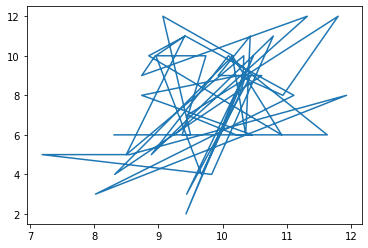

In [18]:
plt.plot(df.x, df.y)

In [19]:
def likelihood(params, y_vector, x_vector):
    ret = 0
    # Parameter of Poisson distribution
    theta = lambda params, x: np.exp(params[0] + params[1]*x)
    for i in range(y_vector.shape[0]):
        ret += y_vector[i] * np.log(theta(params, x_vector[i])) - theta(params, x_vector[i])
    return -ret

In [20]:
# we want to minimize the negative log likelihood, so the minus sign at the end, use scipy
import scipy
from scipy import optimize

In [21]:
# initialite the parameters with random numbers
params = [np.random.rand(), np.random.rand()] 
params

[0.7447163810762378, 0.18450800284686253]

In [22]:
# perform the fit
new_params = scipy.optimize.minimize(likelihood, params, args=(df['y'], df['x']))
new_params

      fun: -412.35493090406703
 hess_inv: array([[ 0.24987811, -0.02503904],
       [-0.02503904,  0.00253554]])
      jac: array([-7.62939453e-06,  3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 6
     njev: 13
   status: 0
  success: True
        x: array([0.74591186, 0.13225651])

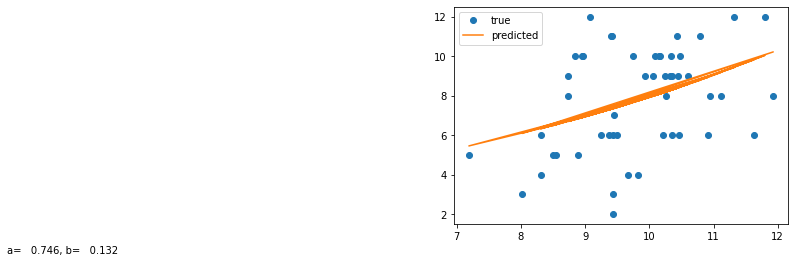

In [24]:
# plot the graph
# Take the predicted parameters
a, b = new_params.x

# Plot
plt.plot(df['x'], df['y'], 'o', label = "true")
plt.plot(df['x'], np.exp(a + b*df['x']), label = "predicted")
plt.text(0, 0, "a={:8.3f}, b={:8.3f}".format(a, b))
plt.legend()
plt.show()


https://vitalflux.com/poisson-distribution-explained-with-python-examples/

Poisson distribution for Space interval: Let’s say that you are out on a long drive. The rate of occurrences of good restaurants in a range of 10 miles (or km) is 2. In other words, the mean number of occurrences of restaurants in a range of 10 KM or miles is 2. What is the probability that 0, 1, 2, 3, 4, or 5 restaurants will occur in the next 10 km. 

In [25]:
from scipy.stats import poisson

In [30]:
#
# Random variable representing number of restaurants
# Mean number of occurences of restaurants in 10 KM is 2
#
X = [0, 1, 2, 3, 4, 5]
lmbda = 2

In [27]:
# Probability values
#
poisson_pd = poisson.pmf(X, lmbda)
poisson_pd

array([0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.09022352,
       0.03608941])

In [31]:
poisson.pmf(0, lmbda)

0.1353352832366127

In [36]:
np.math.factorial(3)

6

In [39]:
np.exp(-lmbda)*np.power(lmbda,3)/np.math.factorial(3)

0.1804470443154836

In [38]:
np.power(2,3)

8

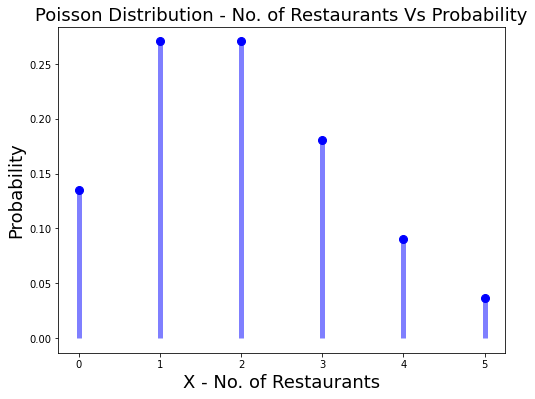

In [42]:
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Restaurants", fontsize="18")
plt.title("Poisson Distribution - No. of Restaurants Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

Poisson distribution for Time interval: Let’s say that the number of buses that come on a bus stop in span of 30 minutes is 1. Poisson distribution can be used to model the probability of different number of buses, X, coming to the bus stop within the next 30 minutes where X can take value of 0, 1, 2, 3, 4. 

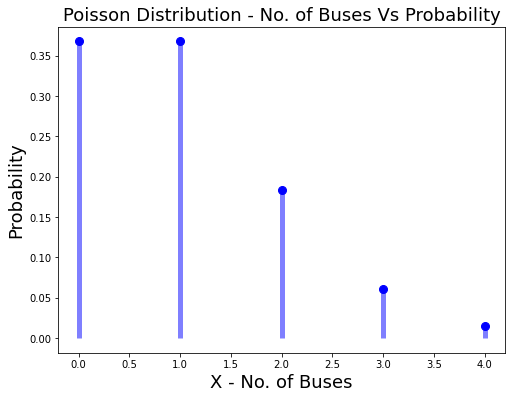

In [43]:
#
# Random variable representing number of buses
# Mean number of buses coming to bus stop in 30 minutes is 1
#
X = [0, 1, 2, 3, 4]
lmbda = 1
#
# Probability values
#
poisson_pd = poisson.pmf(X, lmbda)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Buses", fontsize="18")
plt.title("Poisson Distribution - No. of Buses Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

https://vitalflux.com/poisson-distribution-explained-with-python-examples/

https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html

https://stackoverflow.com/questions/65369784/python-glm-poisson-regression-probabilities

https://datascience.stackexchange.com/questions/23143/poisson-regression-options-in-python

https://stackoverflow.com/questions/37941881/how-to-implement-poisson-regression